Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
#loading CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
#Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
#One-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [5]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [6]:
#For History List Storing 
history_list_sgd = []
history_list_adam = []
history_list_rmsprop = []

#Different Values
momentum_values_sgd = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]
rho_values_rmsprop = [0.0, 0.5, 0.9]

batch_size = 32
epochs = 10

Applying different optimizers

In [7]:
#SGD
print(f"Training with optimizer: SGD")
for momentum_val in momentum_values_sgd:
    print(f"Training with momentum: {momentum_val}")
    model_sgd = create_cnn_model()
    optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    model_sgd.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history_sgd = model_sgd.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                            validation_split=0.1, verbose=1)
    history_list_sgd.append(history_sgd)

#Adam
print(f"Training with optimizer: Adam")
for beta1_val in beta1_values_adam:
    print(f"Training with beta_1: {beta1_val}")
    model_adam = create_cnn_model()
    optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    model_adam.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])
    history_adam = model_adam.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                              validation_split=0.1, verbose=1)
    history_list_adam.append(history_adam)

#RMSprop
print(f"Training with optimizer: RMSprop")
for rho_val in rho_values_rmsprop:
    print(f"Training with rho: {rho_val}")
    model_rmsprop = create_cnn_model()
    optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho_val)
    model_rmsprop.compile(optimizer=optimizer_rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
    history_rmsprop = model_rmsprop.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                                    validation_split=0.1, verbose=1)
    history_list_rmsprop.append(history_rmsprop)

Training with optimizer: SGD
Training with momentum: 0.0
Epoch 1/10
1407/1407 [==============================] - 71s 50ms/step - loss: 2.0086 - accuracy: 0.2761 - val_loss: 1.8382 - val_accuracy: 0.3366
Epoch 2/10
1407/1407 [==============================] - 68s 48ms/step - loss: 1.6465 - accuracy: 0.4113 - val_loss: 1.6037 - val_accuracy: 0.4310
Epoch 3/10
1407/1407 [==============================] - 68s 48ms/step - loss: 1.4533 - accuracy: 0.4826 - val_loss: 1.3755 - val_accuracy: 0.5040
Epoch 4/10
1407/1407 [==============================] - 70s 50ms/step - loss: 1.3276 - accuracy: 0.5293 - val_loss: 1.4872 - val_accuracy: 0.4786
Epoch 5/10
1407/1407 [==============================] - 69s 49ms/step - loss: 1.2244 - accuracy: 0.5683 - val_loss: 1.2766 - val_accuracy: 0.5452
Epoch 6/10
1407/1407 [==============================] - 66s 47ms/step - loss: 1.1328 - accuracy: 0.6024 - val_loss: 1.1857 - val_accuracy: 0.5842
Epoch 7/10
1407/1407 [==============================] - 67s 47ms/st

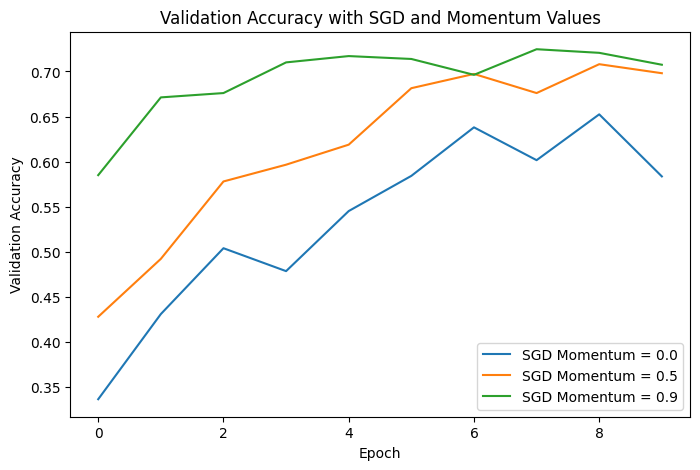

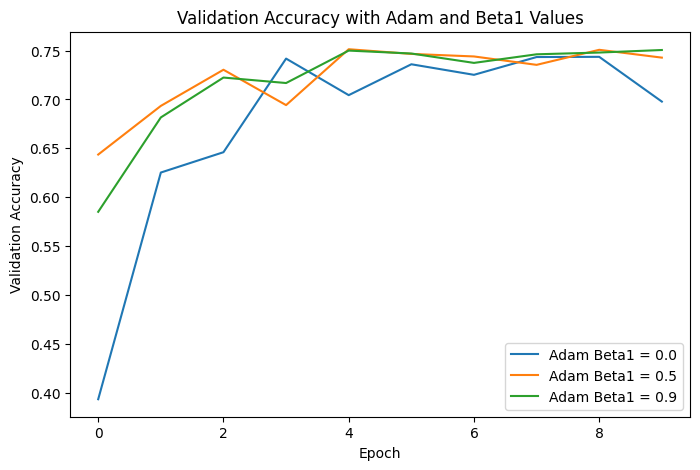

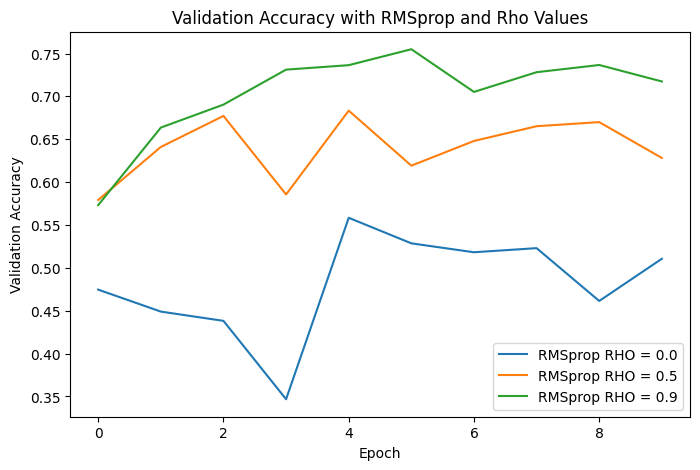

In [15]:
import matplotlib.pyplot as plt
def plot_accuracy(history_list, values, values_name, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        if optimizer_name == 'SGD':
            label_text = f'{optimizer_name} Momentum = {values[i]}'
        elif optimizer_name == 'RMSprop':
            label_text = f'{optimizer_name} RHO = {values[i]}'
        else:
            label_text = f'{optimizer_name} Beta1 = {values[i]}'
        plt.plot(history.history['val_accuracy'], label=label_text)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy with {optimizer_name} and {values_name} Values')
    plt.legend()
    plt.show()

plot_accuracy(history_list_sgd, momentum_values_sgd, 'Momentum', 'SGD')
plot_accuracy(history_list_adam, beta1_values_adam, 'Beta1', 'Adam')
plot_accuracy(history_list_rmsprop, rho_values_rmsprop, 'Rho', 'RMSprop')


Effect of different optimizers:
1. SGD with momentum (learning_rate=0.01)
    For 0.0 test accuracy is 0.693%.
    For 0.5 test accuracy is 0.791%.
    For 0.9 test accuracy is 0.912%.
    
    Best result is with 0.9 momentum.
    
2. Adam with beta_1 (learning_rate=0.001)
    For 0.0 test accuracy is 0.951%.
    For 0.5 test accuracy is 0.946%.
    For 0.9 test accuracy is 0.917%.
    
    Best result is with 0.0 beta_1.
    
3. RMSprop with rho (learning_rate=0.001)
    For 0.0 test accuracy is 0.538%.
    For 0.5 test accuracy is 0.718%.
    For 0.9 test accuracy is 0.894%.
    
    Best result is with 0.9 rho 

Using Regularizes in Conv2D layer

In [25]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [26]:
histories = []

model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
histories.append(history)

Epoch 1/20
782/782 [==============================] - 37s 45ms/step - loss: 1.5285 - accuracy: 0.4415 - val_loss: 1.2149 - val_accuracy: 0.5661
Epoch 2/20
782/782 [==============================] - 35s 44ms/step - loss: 1.1550 - accuracy: 0.5901 - val_loss: 1.0492 - val_accuracy: 0.6264
Epoch 3/20
782/782 [==============================] - 36s 46ms/step - loss: 0.9904 - accuracy: 0.6526 - val_loss: 0.9745 - val_accuracy: 0.6567
Epoch 4/20
782/782 [==============================] - 35s 45ms/step - loss: 0.8735 - accuracy: 0.6952 - val_loss: 0.9277 - val_accuracy: 0.6795
Epoch 5/20
782/782 [==============================] - 37s 48ms/step - loss: 0.7813 - accuracy: 0.7289 - val_loss: 0.8997 - val_accuracy: 0.6838
Epoch 6/20
782/782 [==============================] - 40s 52ms/step - loss: 0.7089 - accuracy: 0.7528 - val_loss: 0.8227 - val_accuracy: 0.7207
Epoch 7/20
782/782 [==============================] - 39s 50ms/step - loss: 0.6488 - accuracy: 0.7734 - val_loss: 0.9092 - val_accuracy:

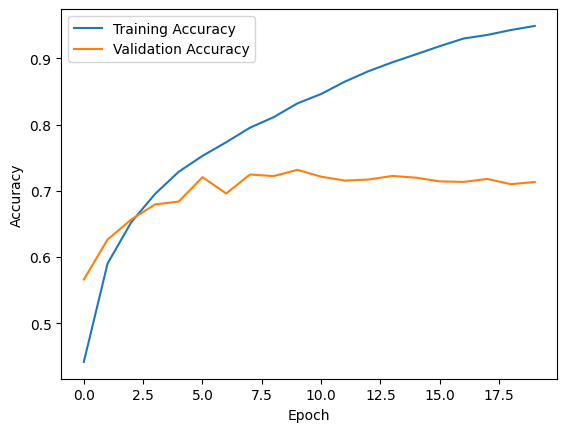

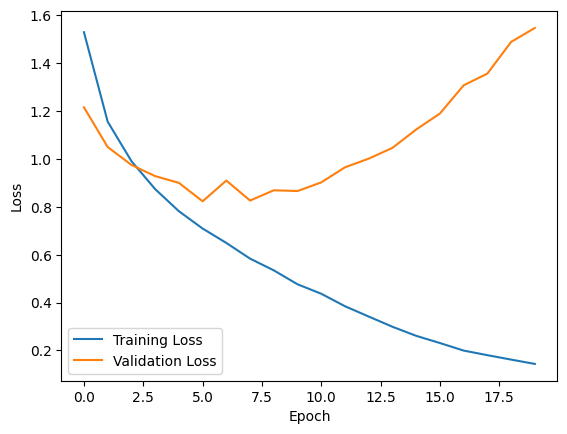

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Without Preprocessing

In [29]:
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_no_preprocessing = model_no_preprocessing.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1
)

Epoch 1/20
782/782 [==============================] - 42s 47ms/step - loss: 1.5126 - accuracy: 0.4469 - val_loss: 1.2184 - val_accuracy: 0.5619
Epoch 2/20
782/782 [==============================] - 38s 48ms/step - loss: 1.1392 - accuracy: 0.5987 - val_loss: 1.0403 - val_accuracy: 0.6275
Epoch 3/20
782/782 [==============================] - 41s 52ms/step - loss: 0.9766 - accuracy: 0.6584 - val_loss: 0.9601 - val_accuracy: 0.6636
Epoch 4/20
782/782 [==============================] - 43s 55ms/step - loss: 0.8679 - accuracy: 0.6962 - val_loss: 0.9026 - val_accuracy: 0.6885
Epoch 5/20
782/782 [==============================] - 47s 60ms/step - loss: 0.7863 - accuracy: 0.7256 - val_loss: 0.8882 - val_accuracy: 0.6902
Epoch 6/20
782/782 [==============================] - 45s 57ms/step - loss: 0.7205 - accuracy: 0.7493 - val_loss: 0.8403 - val_accuracy: 0.7133
Epoch 7/20
782/782 [==============================] - 45s 58ms/step - loss: 0.6506 - accuracy: 0.7751 - val_loss: 0.8099 - val_accuracy:

Comparison for Regularizer vs No Preprocessing

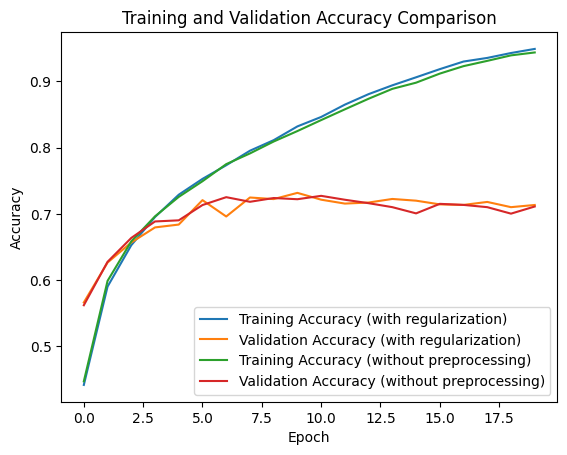

In [32]:
#Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy (with regularization)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (with regularization)')
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy (without preprocessing)')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy (without preprocessing)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()


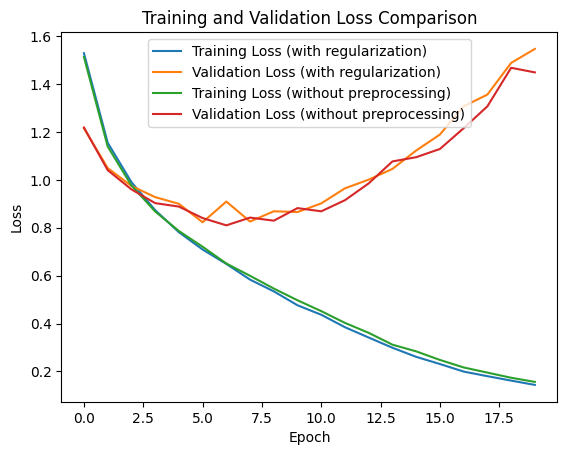

In [33]:
#Loss
plt.plot(history.history['loss'], label='Training Loss (with regularization)')
plt.plot(history.history['val_loss'], label='Validation Loss (with regularization)')
plt.plot(history_no_preprocessing.history['loss'], label='Training Loss (without preprocessing)')
plt.plot(history_no_preprocessing.history['val_loss'], label='Validation Loss (without preprocessing)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()
